# Read SSP file

 finished the run we talked about yesterday. This
is the run where I vary the couplings lambda12 and
lambda13, i.e. MINPAR[14] and MINPAR[15]. I called
it Exa11.spc, it is in the dropbox.

This contains
<code>
1   6 TeV      # vRinput
12  50 TeV    # M1INPUT
13  (2.7-3.1) TeV # M23INPUT
14  [10^-3,1]      # lamT1INPUT
15  [10^-3,1]      # lamT2INPUT
</code>

Aagain scanned logarithmically. The mass of the DM is in a
very small window, to make the dependence of the DD on
lambda more visible.

I also made two runs which are variations of this
one. In Exa11a I put MINPAR[14]==0 and vary only
lamT2, while in Exa11b I put MINPAR[15]==0 and
vary lamT1.


## Initialization

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
from hep import *
import time
from __future__ import print_function
from __future__ import division

## minimal inizialization

In [5]:
lha=open('/tmp/LHA_minimal','w')
lha.write('Block MODSEL      #\n 1 1   #  1/0: High/low scale input')
lha.close()

## Load model with minimal file

In [6]:
a=hep(MODEL='LRDM',spc_input_file='/tmp/LHA_minimal')

Fix input file

In [7]:
%%bash
cat SPheno.ssp.LRDM_original | perl -p -e  's/(^\s*201\s+.*#$)/\1 DDn/'  > kk
cat kk | perl -p -e  's/(^\s*203\s+.*#$)/\1 DDp/'  > kkk
mv kkk SPheno.ssp.LRDM
#diff SPheno.ssp.LRDM kk

## Possible design

`a.scan_ssp(ssp_file,n=1)`

get the n spc file from an SSP output

`a.ssp_ntotal -> number of spc files`

<code>for n in range(1,a.ssp_ntotal+1):
    spc_lha=a.scan_ssp(ssp_file,n)
    #work on spc_lhae
</code>    

## Fast implementation

In [8]:
ssp_file='SPheno.ssp.%s' %a.MODEL
f=open(ssp_file)
spctxt=f.readlines()    

i=0
record=False
start=time.time()
spc=pd.DataFrame()    
for l in spctxt:
    if not record:
        ff=open('SPheno.spc.%s' %a.MODEL,'w')
            
    k=re.match('^\s*endofparameterfile\s*$',l.lower())
    if k:
        record=False #Finalize record
        ff.close()
        #=======All the important code must be here=======
        i=i+1
        if i%100==0: print('.', end='')
        slha=a.readSSP()
        kk=a.branchings(a.LHA_out.decays,min_pdg=25)
        outs=pd.Series({})
        for key in ['MINPAR','MASS','CHMIX','SCALARMIX','AMIX']:
            outs=outs.append( block_to_series(a.LHA_out_with_comments.blocks[key]) )

        outs=outs.append(block_to_series(a.LHA_out_with_comments.blocks['DARKMATTER'],simplify_key=False))            
        outs=outs.append(pd.Series(a.LHA_out.blocks['DMCHANNELS'].entries))
        #outs=outs.append(a.Br_names)
        #outs=outs.append(pd.Series(a.LHA_out_with_comments.blocks['FWCOEF'].entries))
        spc=spc.append(outs,ignore_index=True) 
        #=================================
    else:
        ff.write(l)
        record=True
        
print(time.time()-start)

...................688.706357002


In [167]:
spc.to_excel('lrdm.xlsx',index=False)

## Results

In [95]:
a.LHA_out_with_comments.blocks['MASS'].entries

_dict([(25, '8.65425169E+01  # hh_1'),
       (35, '1.48681290E+02  # hh_2'),
       (335, '3.63765065E+02  # hh_3'),
       (36, '3.58040393E+02  # Ah_3'),
       (37, '3.03137695E+02  # Hpm_3'),
       (9000055, '6.00123787E+02  # deltaRpp'),
       (23, '9.11887000E+01  # VZ'),
       (32, '4.71401698E+03  # VZR'),
       (24, '8.03497269E+01  # VWLm'),
       (34, '2.81355186E+03  # VWRm'),
       (1, '5.00000000E-03  # Fd_1'),
       (3, '9.50000000E-02  # Fd_2'),
       (5, '4.18000000E+00  # Fd_3'),
       (2, '2.50000000E-03  # Fu_1'),
       (4, '1.27000000E+00  # Fu_2'),
       (6, '1.73500000E+02  # Fu_3'),
       (11, '5.10998930E-04  # Fe_1'),
       (13, '1.05658372E-01  # Fe_2'),
       (15, '1.77669000E+00  # Fe_3'),
       (12, '0.00000000E+00  # Fv_1'),
       (14, '0.00000000E+00  # Fv_2'),
       (16, '0.00000000E+00  # Fv_3'),
       (6000012, '0.00000000E+00  # Fv_4'),
       (6000014, '0.00000000E+00  # Fv_5'),
       (6000016, '0.00000000E+00  # Fv_6'),
       (

In [9]:
mpl.style.use('classic')

In [10]:
SPC=spc[spc.DDn>0]

In [11]:
from matplotlib.colors import LogNorm

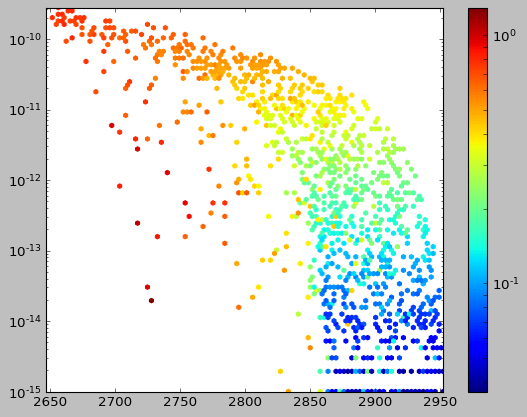

In [12]:
plt.hexbin(SPC.Fc1,SPC.DDn,np.sqrt(SPC.lamT1INPUT**2+SPC.lamT2INPUT**2),yscale='log',norm=LogNorm())
plt.colorbar()

In [148]:
SPCT=SPC[np.logical_or(SPC.lamT2INPUT/SPC.lamT1INPUT>5,SPC.lamT2INPUT/SPC.lamT1INPUT<0.2)]

In [155]:
%matplotlib

Using matplotlib backend: agg


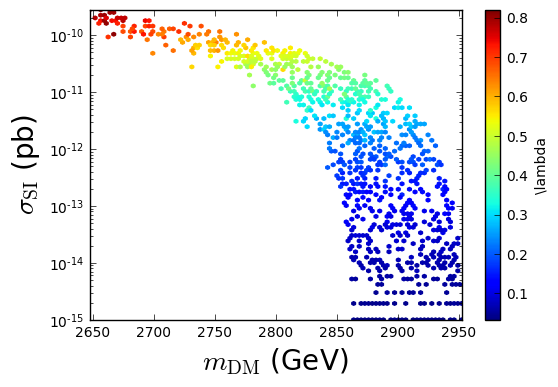

In [166]:
plt.hexbin(SPCT.Fc1,SPCT.DDn,np.sqrt(SPCT.lamT1INPUT**2+SPCT.lamT2INPUT**2),yscale='log')
cl=plt.colorbar()
cl.set_label(r'\lambda')
plt.xlabel(r'$m_{\rm DM}$ (GeV)', size=20)
plt.ylabel(r'$\sigma_{\rm SI}$ (pb)', size=20)
#plt.savefig('lambda.pdf')

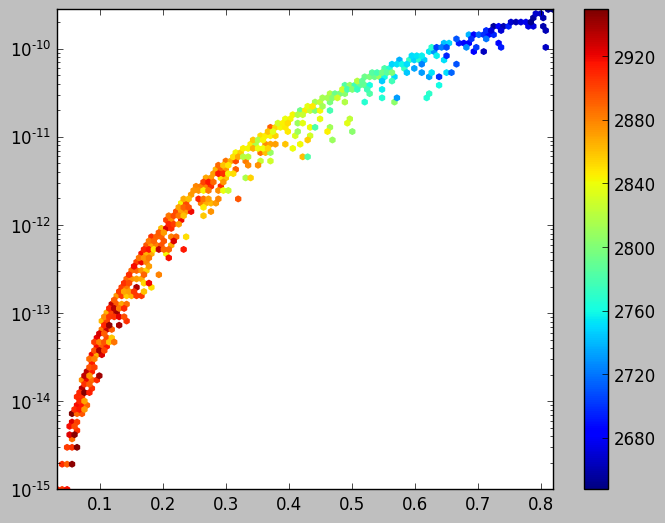

In [147]:
plt.hexbin(np.sqrt(SPCT.lamT1INPUT**2+SPCT.lamT2INPUT**2),SPCT.DDn,SPCT.Fc1,yscale='log')
plt.colorbar()

In [15]:
SPC[SPC.lamT2INPUT<0].shape

(0, 179)

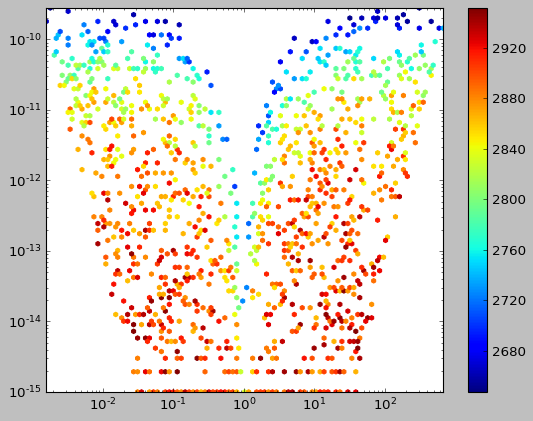

In [16]:
plt.hexbin(SPC.lamT2INPUT/SPC.lamT1INPUT,SPC.DDn,SPC.Fc1,yscale='log',xscale='log')
plt.colorbar()

In [17]:
a.LHA_out_with_comments.blocks['DARKMATTER'].entries

_dict([(1, '0.110345        # relic density '),
       (100, '0.064875        # ~c01 ~c02 -> hh1 Zp'),
       (101, '0.056572        # ~c01 ~c02 -> hh2 Zp'),
       (102, '0.043474        # ~c01 ~c02 -> d1 D1'),
       (103, '0.043474        # ~c01 ~c02 -> d2 D2'),
       (104, '0.043474        # ~c01 ~c02 -> d3 D3'),
       (105, '0.028292        # ~cpp ~Cp1 -> D1 u1'),
       (106, '0.028292        # ~cpp ~Cp1 -> D2 u2'),
       (107, '0.028255        # ~cpp ~Cp1 -> D3 u3'),
       (108, '0.025527        # ~c01 ~c02 -> u1 U1'),
       (109, '0.025527        # ~c01 ~c02 -> u2 U2'),
       (110, '0.02544         # ~c01 ~c02 -> u3 U3'),
       (111, '0.023581        # ~cpp ~Cp1 -> Hmm WRm'),
       (112, '0.021887        # ~c01 ~c02 -> nu4 nu4'),
       (113, '0.021887        # ~c01 ~c02 -> nu5 nu5'),
       (114, '0.021887        # ~c01 ~c02 -> nu6 nu6'),
       (115, '0.019255        # ~cpp ~Cp1 -> A WRp'),
       (116, '0.015553        # ~c01 ~cp1 -> D1 u1'),
       (117, '0.015553  

In [93]:
spc.keys().values

array(['', 'Ah3', 'DDn', 'DDp', 'Fc1', 'Fc2', 'Fc3', 'Fcp1', 'Fcp2',
       'Fcpp', 'Fd1', 'Fd2', 'Fd3', 'Fe1', 'Fe2', 'Fe3', 'Fu1', 'Fu2',
       'Fu3', 'Fv1', 'Fv2', 'Fv3', 'Fv4', 'Fv5', 'Fv6', 'Hpm3', 'M1INPUT',
       'M23INPUT', 'TanBeta', 'UC11', 'UC12', 'UC13', 'UC21', 'UC22',
       'UC23', 'UC31', 'UC32', 'UC33', 'UP11', 'UP12', 'UP13', 'UP21',
       'UP22', 'UP23', 'UP31', 'UP32', 'UP33', 'VWLm', 'VWRm', 'VZ', 'VZR',
       'ZH11', 'ZH12', 'ZH13', 'ZH21', 'ZH22', 'ZH23', 'ZH31', 'ZH32',
       'ZH33', 'alp1INPUT', 'alp2INPUT', 'alp3INPUT', 'deltaRpp', 'hh1',
       'hh2', 'hh3', 'lam1INPUT', 'lam2INPUT', 'lam3INPUT', 'lam4INPUT',
       'lamT1INPUT', 'lamT2INPUT', 'relicdensity', 'rho1INPUT',
       'rho2INPUT', 'vRinput', '~c01~c02->d1D1', '~c01~c02->d2D2',
       '~c01~c02->d3D3', '~c01~c02->hh1Zp', '~c01~c02->hh2Zp',
       '~c01~c02->nu4nu4', '~c01~c02->nu5nu5', '~c01~c02->nu6nu6',
       '~c01~c02->u1U1', '~c01~c02->u2U2', '~c01~c02->u3U3',
       '~c01~cp1->D1u1', '~c0

In [61]:
pd.Series(a.LHA_out_with_comments.blocks['DMCHANNELS'].entries)

(9000012, 9000014, 25, 32)               0.064090
(9000012, 9000014, 35, 32)               0.055893
(9000012, 9000014, 1, 4294967295)        0.042799
(9000012, 9000014, 3, 4294967293)        0.042799
(9000012, 9000014, 5, 4294967291)        0.042799
(6000055, 4294967279, 4294967295, 2)     0.027748
(6000055, 4294967279, 4294967293, 4)     0.027748
(6000055, 4294967279, 4294967291, 6)     0.027712
(9000012, 9000014, 2, 4294967294)        0.025131
(9000012, 9000014, 4, 4294967292)        0.025131
(9000012, 9000014, 6, 4294967290)        0.025045
(6000055, 4294967279, 9000055, 34)       0.023087
(9000012, 9000014, 6000012, 6000012)     0.021547
(9000012, 9000014, 6000014, 6000014)     0.021547
(9000012, 9000014, 6000016, 6000016)     0.021547
(9000012, 17, 4294967295, 2)             0.021337
(9000012, 17, 4294967293, 4)             0.021337
(9000012, 17, 4294967291, 6)             0.021309
(6000055, 4294967279, 22, 4294967262)    0.019077
(9000012, 17, 9000055, 34)               0.017294


In [43]:
pd.Se

Series([], dtype: float64)

In [15]:
cat SPheno.spc.LRDMtmp

# SUSY Les Houches Accord 2 - MixedDMLR Spectrum + Decays + Flavor Observables
# SPheno module generated by SARAH
# ----------------------------------------------------------------------
# SPheno v3.3.8  
#   W. Porod, Comput. Phys. Commun. 153 (2003) 275-315, hep-ph/0301101
#   W. Porod, F.Staub, Comput.Phys.Commun.183 (2012) 2458-2469, arXiv:1104.1573
# SARAH: 4.9.1   
#   F. Staub; arXiv:0806.0538 (online manual)
#   F. Staub; Comput. Phys. Commun. 181 (2010) 1077-1086; arXiv:0909.2863
#   F. Staub; Comput. Phys. Commun. 182 (2011)  808-833; arXiv:1002.0840
#   F. Staub; Comput. Phys. Commun. 184 (2013)  1792-1809; arXiv:1207.0906
#   F. Staub; Comput. Phys. Commun. 185 (2014)  1773-1790; arXiv:1309.7223 
# Including the calculation of flavor observables based on the FlavorKit 
#   W. Porod, F. Staub, A. Vicente; Eur.Phys.J. C74 (2014) 8, 2992; arXiv:1405.1434 
# Two-loop masss corrections to Higgs fields based on 
#   M. D. Goodsell, K. Nickel, F. Staub; arXiv:1411.0675 
#   M. D. 

In [34]:
a.LHA_out_with_comments.blocks['DARKMATTER'].entries

_dict([(1, '0.119991        # relic density '),
       (100, '0.06409         # ~c01 ~c02 -> hh1 Zp'),
       (101, '0.055893        # ~c01 ~c02 -> hh2 Zp'),
       (102, '0.042799        # ~c01 ~c02 -> d1 D1'),
       (103, '0.042799        # ~c01 ~c02 -> d2 D2'),
       (104, '0.042799        # ~c01 ~c02 -> d3 D3'),
       (105, '0.027748        # ~cpp ~Cp1 -> D1 u1'),
       (106, '0.027748        # ~cpp ~Cp1 -> D2 u2'),
       (107, '0.027712        # ~cpp ~Cp1 -> D3 u3'),
       (108, '0.025131        # ~c01 ~c02 -> u1 U1'),
       (109, '0.025131        # ~c01 ~c02 -> u2 U2'),
       (110, '0.025045        # ~c01 ~c02 -> u3 U3'),
       (111, '0.023087        # ~cpp ~Cp1 -> Hmm WRm'),
       (112, '0.021547        # ~c01 ~c02 -> nu4 nu4'),
       (113, '0.021547        # ~c01 ~c02 -> nu5 nu5'),
       (114, '0.021547        # ~c01 ~c02 -> nu6 nu6'),
       (115, '0.021337        # ~c01 ~cp1 -> D1 u1'),
       (116, '0.021337        # ~c01 ~cp1 -> D2 u2'),
       (117, '0.021309  

In [25]:
cat SPheno.spc.LRDMtmp_nodecays.spc

# SUSY Les Houches Accord 2 - MixedDMLR Spectrum + Decays + Flavor Observables
# SPheno module generated by SARAH
# ----------------------------------------------------------------------
# SPheno v3.3.8  
#   W. Porod, Comput. Phys. Commun. 153 (2003) 275-315, hep-ph/0301101
#   W. Porod, F.Staub, Comput.Phys.Commun.183 (2012) 2458-2469, arXiv:1104.1573
# SARAH: 4.9.1   
#   F. Staub; arXiv:0806.0538 (online manual)
#   F. Staub; Comput. Phys. Commun. 181 (2010) 1077-1086; arXiv:0909.2863
#   F. Staub; Comput. Phys. Commun. 182 (2011)  808-833; arXiv:1002.0840
#   F. Staub; Comput. Phys. Commun. 184 (2013)  1792-1809; arXiv:1207.0906
#   F. Staub; Comput. Phys. Commun. 185 (2014)  1773-1790; arXiv:1309.7223 
# Including the calculation of flavor observables based on the FlavorKit 
#   W. Porod, F. Staub, A. Vicente; Eur.Phys.J. C74 (2014) 8, 2992; arXiv:1405.1434 
# Two-loop masss corrections to Higgs fields based on 
#   M. D. Goodsell, K. Nickel, F. Staub; arXiv:1411.0675 
#   M. D. 

In [16]:
import pandas as pd
import re

def ssp_parser(ssp_file):
    '''
    Convert a Web of Science text file into a pandas DataFrame.
    The text file is generated by following the instructions in:
    
    http://diging.github.io/tethne/getting_data.html
    '''



In [17]:
ssp_parser(wos_file)

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE

ENDOFPARAMETERFILE



1